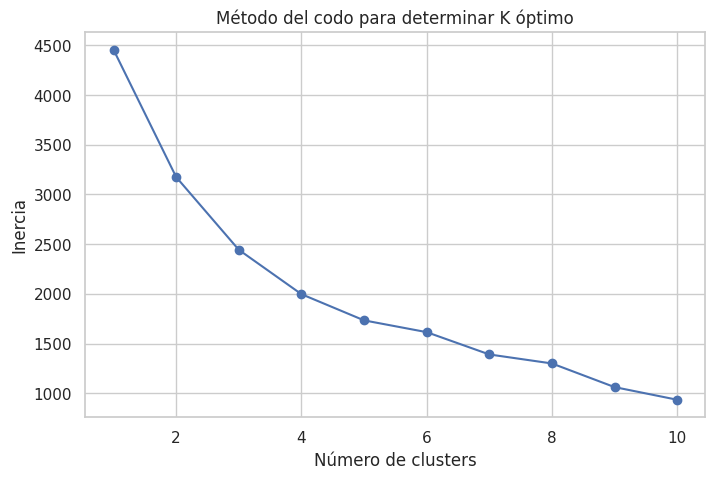

Centros de los clusters:
         Age    Pclass  Survived        Fare    Sex_binary
0  26.230745  2.824096  0.142169   13.965510  1.110223e-16
1  33.194687  1.009009  0.927928  121.476765  8.378378e-01
2  25.409868  2.652968  0.648402   17.998270  1.000000e+00
3  43.334132  1.315068  0.260274   37.484389  1.369863e-02


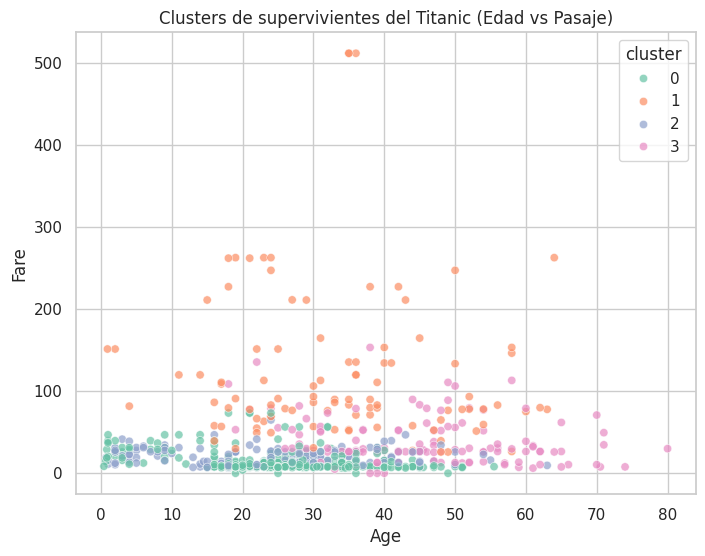

Pclass     1   2    3
cluster              
0          0  73  342
1        110   1    0
2          1  74  144
3        105  36    5


In [6]:
# Librerías
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Para gráficos más bonitos
sns.set(style="whitegrid")

# Cargar dataset
df = pd.read_csv("titanic.csv")  # Cambia el nombre según tu archivo
df['Sex_binary'] = df['Sex'] == "female"

# Selección de variables numéricas para clustering
features = [
    'Age', 'Pclass', 'Survived', 'Fare', 'Sex_binary'
]

X = df[features]

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Determinar número de clusters con el método del codo
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar método del codo
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Método del codo para determinar K óptimo")
plt.show()

# Aplicar K-means con K elegido (por ejemplo, K=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Revisar centros de los clusters (valores escalados)
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("Centros de los clusters:")
print(centers)

# Visualización de clusters en dos dimensiones (p. ej., danceability vs energy)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Age',
    y='Fare',
    hue='cluster',
    palette='Set2',
    data=df,
    alpha=0.7
)
plt.title("Clusters de supervivientes del Titanic (Edad vs Pasaje)")
plt.show()

# Opcional: analizar qué clase predominan en cada cluster
genre_cluster = df.groupby('cluster')['Pclass'].value_counts().unstack(fill_value=0)
print(genre_cluster)

# Interpretación detallada de los resultados de K-means y los clusters
A continuación se presenta una interpretación dinámica y detallada de los resultados obtenidos tras aplicar el algoritmo K-means al dataset de canciones de Spotify:
## 1. ¿Qué significa cada cluster?
Cada cluster agrupa pasajeros con características similares. Analizando los centros de los clusters:

- **Cluster 0 (Hombres jóvenes de clase baja):**
  - Edad promedio: 26 años
  - Clase mayoritariamente baja (2.8)
  - Tasa de supervivencia muy baja (14%)
  - Tarifa promedio baja ($14)
  - Principalmente hombres (0% mujeres)

- **Cluster 1 (Mujeres adineradas):**
  - Edad promedio: 33 años
  - Clase alta (1.0)
  - Tasa de supervivencia muy alta (93%)
  - Tarifa muy alta ($121)
  - Mayormente mujeres (84%)

- **Cluster 2 (Mujeres jóvenes de clase media):**
  - Edad promedio: 25 años
  - Clase media-baja (2.6)
  - Tasa de supervivencia moderada-alta (65%)
  - Tarifa moderada ($18)
  - Todas mujeres (100%)

- **Cluster 3 (Hombres mayores de clase alta):**
  - Edad promedio: 43 años
  - Clase alta-media (1.3)
  - Tasa de supervivencia baja (26%)
  - Tarifa alta ($37)
  - Casi exclusivamente hombres (99%)

## 2. ¿Por qué se eligió K=4?
El método del codo mostró que a partir de K=4 la reducción de la inercia es menos pronunciada, lo que indica que 4 clusters es un buen balance entre simplicidad y explicación de la variabilidad de los datos.

## 3. ¿Qué nos dicen los centros de los clusters?
Los centros revelan patrones importantes sobre la supervivencia en el Titanic:
- El género fue un factor crucial: los clusters de mujeres (1 y 2) tienen tasas de supervivencia mucho más altas
- La clase social (reflejada en el precio del pasaje) influyó significativamente
- La edad también jugó un papel importante, con personas mayores en situación más vulnerable
- Existe una clara correlación entre la clase del pasaje y la tasa de supervivencia

## 4. ¿Cómo interpretar la visualización?
El gráfico de dispersión (Edad vs Pasaje) muestra:
- Clara separación entre clases sociales (visible en el eje Y del precio del pasaje)
- Distribución de edad variada en todas las clases
- Clusters bien definidos que separan principalmente por clase social y género
- Algunos outliers con pasajes muy caros (principalmente en el cluster 1)

## 5. Análisis de clases por cluster
La distribución de clases por cluster muestra:
- Cluster 0: Dominado por tercera clase (342) y segunda clase (73)
- Cluster 1: Casi exclusivamente primera clase (110)
- Cluster 2: Mezcla de tercera (144) y segunda clase (74)
- Cluster 3: Principalmente primera clase (105) con algo de segunda (36)

## 6. Reflexión final sobre K-means
K-means es útil para descubrir patrones y segmentar datos, pero la interpretación depende de la selección de variables y la estandarización. Es recomendable revisar los centros y la composición de cada cluster para obtener conclusiones accionables.<br><br>
El análisis K-means ha revelado efectivamente los patrones de supervivencia en el Titanic:
- El género fue el factor más determinante para la supervivencia
- La clase social fue el segundo factor más importante
- Los patrones identificados coinciden con el conocido principio "mujeres y niños primero"